<a href="https://colab.research.google.com/github/karenwhite33/NLP_Sentiment_Analysis_User_Reviews/blob/main/2_Data_EDA_NLP_Amazon_Sent_Analysis_scientific_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2_Normalización**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install stop-words

In [5]:
import random
import numpy as np
import pandas as pd
from collections import Counter # Exploración
from nltk import ngrams # Exploración
from nltk.probability import FreqDist # Exploración
from stop_words import get_stop_words # Preprocesado
import unicodedata # Preprocesado
import re # Preprocesado


import matplotlib.pyplot as plt

In [ ]:
# Cargar el df_clean (balanceado y limpio) desde el archivo Pickle
df_clean = pd.read_pickle("/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_clean2.pkl")

In [ ]:
# Eliminar la columna 'num_words' después del Counter
df_clean.drop(columns=['num_words'], inplace=True)

# Verifica que la columna haya sido eliminada
df_clean.head()

,review,sentiment
0,These masks are great even though there is no ...,5
1,These scissors are so good they got stolen by ...,5
2,Good. Sensor push easier to work with but thes...,4
3,Great ORB finish & size. Bought for our laundr...,5
4,Wow the sticking power on this stuff is crazy....,4


In [ ]:
df_clean.shape

(10000, 2)

# **1. Limpieza de texto**

 1. Eliminaré etiquetas HTML
 2. Convertiré los números a palabras
 3. Eliminaré caracteres especiales (excepto palabras)
 4. Convertiré el texto a minúsculas
 5. Eliminaré espacios al inicio y al final

In [ ]:
pip install num2words

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 4.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=a09b9ad9fa8c6e1ce4735a27bcab6223fe5169d852e147f903ad8165269bf8cf
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import re
from num2words import num2words

# Función de limpieza de texto (primer paso)
def clean_text(text):
    # 1. Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)

    # 2. Convertir los números a palabras
    text = re.sub(r'\b\d+\b', lambda x: num2words(int(x.group())), text)

    # 3. Eliminar caracteres especiales (excepto las palabras)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 4. Convertir el texto a minúsculas
    text = text.lower()

    # 5. Eliminar espacios al inicio y al final
    text = text.strip()

    return text

# Aplicar la limpieza de texto al DataFrame de reseñas
df_clean['cleaned_review'] = df_clean['review'].apply(clean_text)

# Verificar las primeras filas después de la limpieza
print(df_clean[['review', 'cleaned_review']].head())


                                              review  \
0  These masks are great even though there is no ...   
1  These scissors are so good they got stolen by ...   
2  Good. Sensor push easier to work with but thes...   
3  Great ORB finish & size. Bought for our laundr...   
4  Wow the sticking power on this stuff is crazy....   

                                      cleaned_review  
0  these masks are great even though there is no ...  
1  these scissors are so good they got stolen by ...  
2  good sensor push easier to work with but these...  
3  great orb finish  size bought for our laundry ...  
4  wow the sticking power on this stuff is crazy ...  


In [ ]:
# Guardar el clean de reseñas df_cleaned
df_clean.to_pickle("/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_clean_cleaned.pkl")


# **Verificación de idiomas en el dataframe**

In [ ]:
# Cargar el df_clean (balanceado y limpio) desde el archivo Pickle
df_clean = pd.read_pickle("/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_clean_cleaned.pkl")

In [ ]:
df_clean.head()

,review,sentiment,cleaned_review
0,These masks are great even though there is no ...,5,these masks are great even though there is no ...
1,These scissors are so good they got stolen by ...,5,these scissors are so good they got stolen by ...
2,Good. Sensor push easier to work with but thes...,4,good sensor push easier to work with but these...
3,Great ORB finish & size. Bought for our laundr...,5,great orb finish size bought for our laundry ...
4,Wow the sticking power on this stuff is crazy....,4,wow the sticking power on this stuff is crazy ...


In [ ]:
pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=f72d8fa44efc7f8f2e84acb3a2c0fb4afd8c23c922ee43ee8550dd7eb341629e
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
import langid

# Función para detectar el idioma de una reseña
def detect_language(text):
    lang, _ = langid.classify(text)
    return lang

# Detectar el idioma de cada reseña
df_clean['language'] = df_clean['review'].apply(detect_language)

# Ver cuántos idiomas únicos hay en el dataset
unique_languages = df_clean['language'].nunique()
print(f"Number of unique languages: {unique_languages}")

# Ver la distribución de idiomas
language_distribution = df_clean['language'].value_counts()
print("\nLanguage distribution:")
print(language_distribution)


Number of unique languages: 25

Language distribution:
language
en    9826
es      48
nl      27
fr      20
de      17
da      12
it      11
pt       9
et       5
hr       3
ca       3
sv       2
ja       2
id       2
cs       2
pl       2
zh       1
lv       1
hu       1
af       1
no       1
oc       1
ro       1
vi       1
mg       1
Name: count, dtype: int64


**Hay 25 lenguajes en el df**

*   Un 2% son reviews en diferentes idiomas al inglés por lo que puedo trabajar con modelos multilingues más adelante pero computacionalmente puede ser mas caro y lento o traducir ese 2% al inglés para solo trabajar con un idioma pero a futuro si mi modelo recibe datos nuevos en otros idiomas, tocará hacer traduccion por cada uno de los registros nuevos que entren en otro idioma.

*   El manejo de StopWords para cada idioma debe ser especifico y por eso utilizaré la librearía multilingue de **nltk.**

*   Usaré un bloque try-except en el código para garantizar que si un idioma no está disponible en NLTK, simplemente se asigna un conjunto vacío de stopwords para ese idioma, sin interrumpir el flujo de trabajo.

# **2. Eliminación de StopWords:**

Esto mejorará la calidad del modelo pues en la etapa exploratoria muchas de las palabras frecuentes y relevantes parecian ser preposiciones, articulos, conectores, etc y esto impide que el modelo performe bien.

In [ ]:
pip install nltk

In [ ]:
pip install langdetect

In [ ]:
import nltk
from nltk.corpus import stopwords
from langdetect import detect, LangDetectException
from tqdm import tqdm
import re

# Descargar el diccionario de stopwords
nltk.download('stopwords')

# Diccionario de stopwords para lenguajes existentes, si no se detecta ninguno se mantiene el texto
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'es': set(stopwords.words('spanish')),
    'fr': set(stopwords.words('french')),
    'de': set(stopwords.words('german')),
    'it': set(stopwords.words('italian')),
    'nl': set(stopwords.words('dutch')),
    'pt': set(stopwords.words('portuguese')),
    'ru': set(stopwords.words('russian')),
    'ar': set(stopwords.words('arabic')),
}

# Función para tokenizar manualmente el texto, separando por espacios
def simple_word_tokenize(text):
    # Eliminar caracteres no alfanuméricos y separar por espacio
    words = re.findall(r'\b\w+\b', text.lower())  # Convertir a minúsculas
    return words

# Función para eliminar stopwords
def remove_stopwords(text, language):
    words = simple_word_tokenize(text)  # Usar la tokenización personalizada
    stop_words = stopwords_dict.get(language, set())  # Obtener stopwords para el idioma detectado

    # Filtrar las stopwords
    filtered_words = [word for word in words if word not in stop_words]

    return ' '.join(filtered_words)

# Aplicar la eliminación de stopwords a la columna 'cleaned_review'
def remove_stopwords_from_reviews(df):
    processed_reviews = []

    # Iterar por cada reseña
    for review in tqdm(df['cleaned_review'], desc="Eliminando stopwords"):
        try:
            # Verificar si el texto de la reseña es válido antes de aplicar la detección de idioma
            if review and len(review.split()) > 1:  # Saltar si el texto es muy corto o está vacío
                language = detect(review)  # Detectar el idioma
                processed_review = remove_stopwords(review, language)
            else:
                processed_review = review  # Si no se detecta un idioma válido, mantener el texto original
        except LangDetectException:
            processed_review = review  # Si falla la detección del idioma, mantener el texto original

        processed_reviews.append(processed_review)

    # Añadir las reseñas procesadas al dataframe
    df['processed_review'] = processed_reviews
    return df

df_clean = remove_stopwords_from_reviews(df_clean)

# Verificar los resultados en la columna processed_review
print(df_clean[['review', 'cleaned_review', 'processed_review']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Removing stopwords: 100%|██████████| 10000/10000 [01:12<00:00, 137.51it/s]

                                              review  \
0  These masks are great even though there is no ...   
1  These scissors are so good they got stolen by ...   
2  Good. Sensor push easier to work with but thes...   
3  Great ORB finish & size. Bought for our laundr...   
4  Wow the sticking power on this stuff is crazy....   

                                      cleaned_review  \
0  these masks are great even though there is no ...   
1  these scissors are so good they got stolen by ...   
2  good sensor push easier to work with but these...   
3  great orb finish  size bought for our laundry ...   
4  wow the sticking power on this stuff is crazy ...   

                                    processed_review  
0  masks great even though inside outside let kno...  
1  scissors good got stolen one home care aides r...  
2              good sensor push easier work reliable  
3   great orb finish size bought laundry room closet  
4  wow sticking power stuff crazy using mount pro..

In [ ]:
# guardar df con cleaning de stopwords
df_clean.to_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_clean_stopwords.pkl')


In [ ]:
# Cargar el df_clean (balanceado y limpio) desde el archivo Pickle
df_clean = pd.read_pickle("/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_clean_stopwords.pkl")

In [ ]:
df_clean.head()

,review,sentiment,cleaned_review,language,processed_review
0,These masks are great even though there is no ...,5,these masks are great even though there is no ...,en,masks great even though inside outside let kno...
1,These scissors are so good they got stolen by ...,5,these scissors are so good they got stolen by ...,en,scissors good got stolen one home care aides r...
2,Good. Sensor push easier to work with but thes...,4,good sensor push easier to work with but these...,en,good sensor push easier work reliable
3,Great ORB finish & size. Bought for our laundr...,5,great orb finish size bought for our laundry ...,en,great orb finish size bought laundry room closet
4,Wow the sticking power on this stuff is crazy....,4,wow the sticking power on this stuff is crazy ...,en,wow sticking power stuff crazy using mount pro...


In [ ]:
# Chequear si los espacios que se ven en processed_review son the alineacion del cuadro y no espacios del texto de la review.
print(df_clean['processed_review'][2])


good sensor push easier work reliable


# **Check de la Tokenization:**

Revisaré que este funcionado la tokenización:

In [ ]:
tokens = simple_word_tokenize("These are masks. They are very useful!")
print(tokens)  # This will print the tokenized words


['these', 'are', 'masks', 'they', 'are', 'very', 'useful']


## **3. Lemmatization**

Escogeré hacer lematización ya que para el contexto de un sentiment analysis es preferible mantener intacto el contexto de las palabras y no perderlo.

Stemming elimina el prefijo y sufijo de la palabras, su procesamiento es mas rapido pero puede generar alguna palabra no valida y perder contexto.

Aqui el signifcado de cada palabra importa.

Esto tambien reducira variaciones de una misma palabra segun su contexto.

Uitlizaré WordNetLemattizer que hace aprte de la libreriá NLTK y se basa en el lexico de WordNet.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Descargar el diccionario de stopwords y lematizador
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para tokenizar el texto manualmente (sin usar el tokenizador de NLTK)
def simple_word_tokenize(text):
    # Eliminar caracteres no alfanuméricos y separar por espacios
    words = re.findall(r'\b\w+\b', text.lower())  # Convertir a minúsculas
    return words

# Función para lematizar el texto
def lemmatize_text(text):
    words = simple_word_tokenize(text)  # Usar la tokenización personalizada
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lematizar cada palabra
    return ' '.join(lemmatized_words)

# Aplicar la lematización a la columna 'processed_review'
df_clean['lemmatized_review'] = df_clean['processed_review'].apply(lemmatize_text)

# Verificar los resultados en la columna 'lemmatized_review'
print(df_clean[['review', 'processed_review', 'lemmatized_review']].head(20))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                               review  \
0   These masks are great even though there is no ...   
1   These scissors are so good they got stolen by ...   
2   Good. Sensor push easier to work with but thes...   
3   Great ORB finish & size. Bought for our laundr...   
4   Wow the sticking power on this stuff is crazy....   
5   I love this sign, live on a corner and near 2 ...   
6   Comfortable, doesn’t fray, value for money for...   
7   good fit. . . . just a few adjustments of soun...   
8   Took some time to get but it's coming from Chi...   
9                         Good product, fast shipping   
10  This product is necessary in order to keep an ...   
11                                    Hand protection   
12                                         It’s great   
13                           Fit nicely and wear well   
14  This is the easiest way to remove ugly fuzz bi...   
15  This machine functions as advertized.  However...   
16  I have an 8x12 area rug on 

In [ ]:
# Revisar si ha cambiado lemma review respecto a processed review
df_clean[['processed_review', 'lemmatized_review']].head(20)  # Print first 20 rows to inspect changes


,processed_review,lemmatized_review
0,masks great even though inside outside let kno...,mask great even though inside outside let know...
1,scissors good got stolen one home care aides r...,scissors good got stolen one home care aide re...
2,good sensor push easier work reliable,good sensor push easier work reliable
3,great orb finish size bought laundry room closet,great orb finish size bought laundry room closet
4,wow sticking power stuff crazy using mount pro...,wow sticking power stuff crazy using mount pro...
5,love sign live corner near two schools everyon...,love sign live corner near two school everyone...
6,comfortable doesnt fray value money sure,comfortable doesnt fray value money sure
7,good fit adjustments sound fit acoustics car,good fit adjustment sound fit acoustic car
8,took time get coming china nice semisoft rubbe...,took time get coming china nice semisoft rubbe...
9,good product fast shipping,good product fast shipping


In [ ]:
# Guardar df con clean lemma
df_clean.to_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_clean_lemma.pkl')

In [28]:
# Cargar el df_clean (balanceado y limpio) desde el archivo Pickle
df_clean = pd.read_pickle("/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_clean_lemma.pkl")

# **Words Most Common**

In [19]:
import pandas as pd
import re
from collections import Counter

# Función para obtener las palabras de un texto
def words(text):
    return re.findall(r"\w+", text.lower())

# Combinar todas las reseñas en una sola cadena de texto
text = ' '.join(df_clean['lemmatized_review'].dropna())

# Contar las palabras más comunes
word_counts = Counter(words(text))

# Mostrar las 100 palabras más comunes en formato vertical
most_common_words = word_counts.most_common(100)

# Imprimir los resultados en formato vertical
for word, count in most_common_words:
    print(f"{word}: {count}")


one: 2977
use: 2775
work: 2576
like: 2079
good: 1888
great: 1879
well: 1840
get: 1814
would: 1753
product: 1455
time: 1408
used: 1361
two: 1211
dont: 1185
need: 1173
easy: 1089
make: 1040
really: 997
much: 945
im: 944
also: 938
thing: 936
quality: 916
mask: 901
small: 889
using: 888
even: 867
little: 839
come: 834
tape: 830
box: 786
size: 783
fit: 780
bag: 772
nice: 760
put: 759
hold: 757
better: 727
plastic: 704
made: 696
item: 685
way: 676
keep: 671
recommend: 669
got: 667
ive: 666
didnt: 666
price: 663
three: 657
back: 642
could: 628
set: 626
look: 614
lot: 614
review: 613
buy: 606
around: 605
enough: 589
see: 585
bought: 584
doesnt: 579
first: 577
go: 567
love: 560
bottle: 559
clean: 555
still: 555
needed: 533
worked: 513
know: 511
bit: 511
easily: 508
perfect: 507
hundred: 503
filament: 503
without: 502
take: 500
water: 500
light: 497
job: 493
want: 493
hand: 489
long: 484
screw: 483
tried: 480
sure: 477
vacuum: 475
different: 473
something: 473
find: 465
side: 452
hard: 451
probl

## **Análisis most common words después de preprocesamiento:**

*   one: 2977

  use: 2775

  work: 2576

  like: 2079

  good: 1888

  great: 1879

  well: 1840

  get: 1814

  would: 1753

  product: 1455


Estas top 10 palabras suelen ser funcionales, algunas muy generales.

Palabras como "use", "one", "like", "good" y "really" no tienen mucho valor semántico por sí solas para un modelo de análisis de sentimiento, por lo que las quiero analizar en el modelado en contexto con n-gramas y asi poder mejorar la precisión del análisis.

## **Visualización WordCloud después de preprocesamiento**

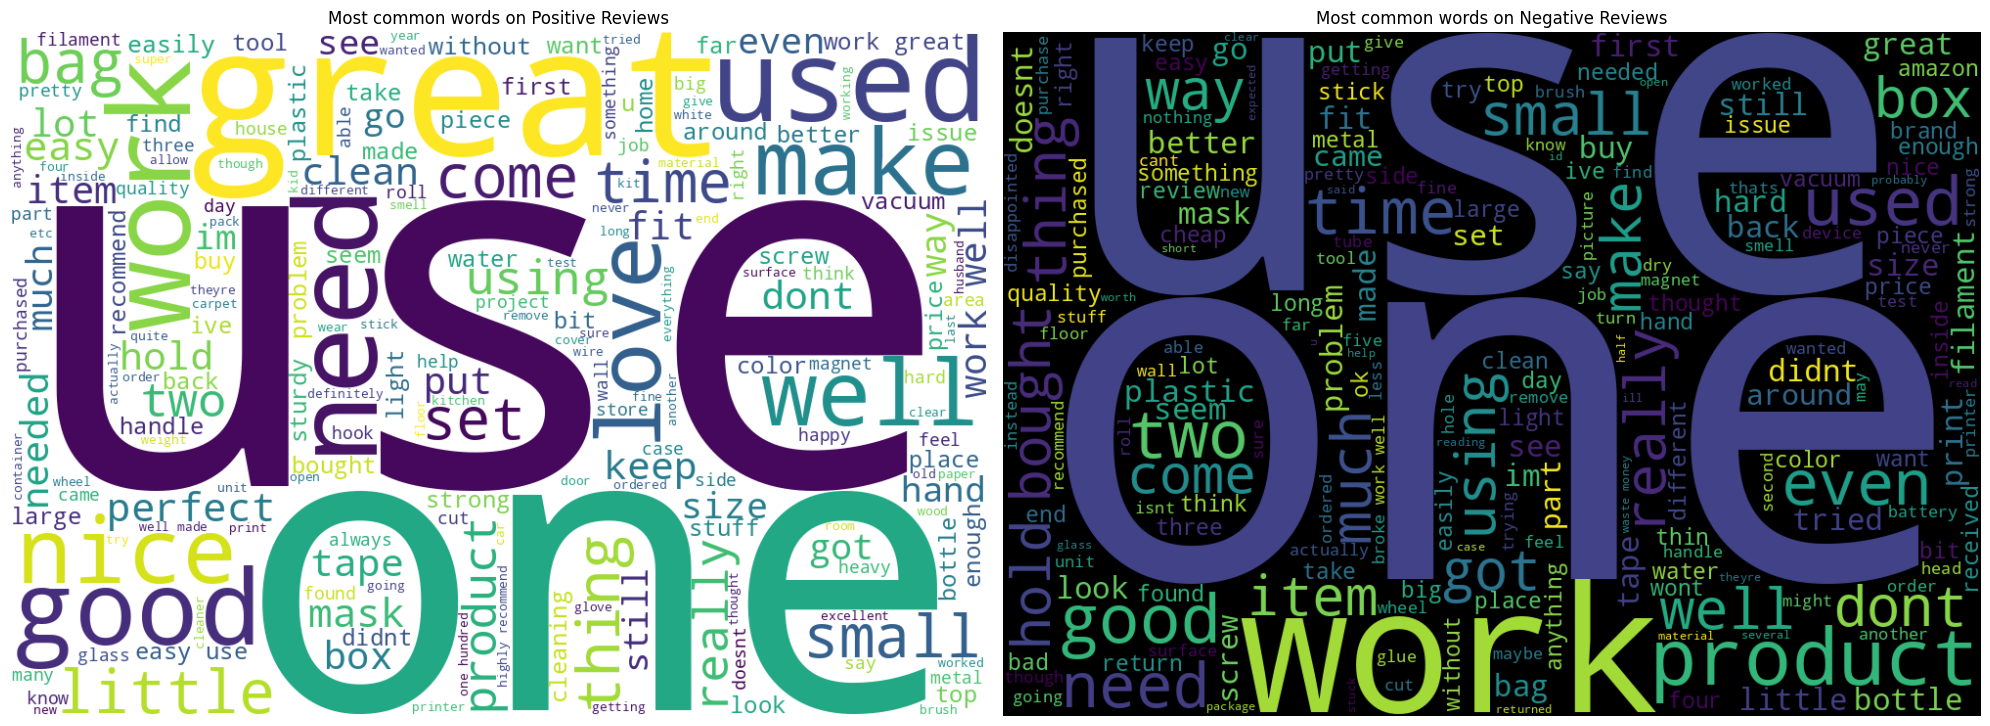

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtramos las reseñas positivas y negativas basadas en el rango de 'sentiment'
positive_reviews = df_clean[df_clean['sentiment'] > 3]['lemmatized_review']
negative_reviews = df_clean[df_clean['sentiment'] <= 3]['lemmatized_review']

# Concatenar todas las reseñas positivas y negativas en un solo texto
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generamos las nubes de palabras
positive_wordcloud = WordCloud(width=1000, height=700, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=1000, height=700, background_color='black').generate(negative_text)

# Mostramos las nubes de palabras
plt.figure(figsize=(20, 10))

# Nube de palabras positivas
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words on Positive Reviews')

# Nube de palabras negativas
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common words on Negative Reviews')

plt.tight_layout()
plt.show()


*   ➕**Reseñas Positivas**

 "good", "great", "love", "perfect", "fit", "quality", "easy", "works", "recommend".

Las palabras como "good", "great", "perfect" y "love" son indicativas de que las reseñas en esta categoría son generalmente muy positivas. Los usuarios están expresando satisfacción con los productos, destacando aspectos como la calidad, el ajuste y la facilidad de uso.

Términos como "recommend" sugieren que los clientes están dispuestos a recomendar el producto, lo cual es un fuerte indicio de una experiencia positiva.

"Fit", "quality" y "perfect" apuntan a que los productos que se reseñan tienen características que cumplen o superan las expectativas del consumidor.

Palabras como "easy", "works" y "love" apuntan a una experiencia de usuario satisfactoria, sin problemas importantes.


*   ➖**Reseñas Negativas**

"dont", "poor", "not", "waste", "returned", "cheap", "no", "wouldnt", "problem".

La presencia de "dont", "not" y "no" indica una clara tendencia hacia el rechazo o insatisfacción con el producto. Las palabras negativas son prominentes, lo que indica que los usuarios se están enfocando en aspectos decepcionantes o problemáticos.

Términos como "poor", "waste", "cheap", y "problem" refuerzan la idea de que los consumidores están destacando fallas importantes en los productos, ya sea en su desempeño, calidad o utilidad.

"Returned" sugiere que los usuarios han tenido que devolver los productos, lo cual es un signo claro de insatisfacción.

La palabra "wouldnt" también implica una falta de recomendación o disposición para volver a comprar el producto, lo que muestra una experiencia negativa en general.



   💡**Plan en modelado**

*   Mejorar el modelo: Si bien las nubes de palabras ya muestran una buena distinción entre reseñas positivas y negativas, sería útil usar estas observaciones para ajustar y entrenar un modelo de clasificación supervisada con técnicas de NLP más avanzadas (como TF-IDF o word embeddings) para mejorar la precisión en la predicción de sentimientos.

*   Considerar el contexto: Las nubes de palabras se enfocan en palabras aisladas. Para entender mejor el sentimiento detrás de las reseñas, el análisis de las frases completas y el contexto en que se usan esas palabras será crucial, lo cual se puede lograr con modelos como los basados en transformers (por ejemplo, BERT, GPT) que capturan el contexto completo de las palabras.

## **Chequear Dispersión Léxica**

Quiero revisar la frecuencia de esas most common words a lo largo del corpus y cuan dispersas estan en el conjunto de documentos.


In [34]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


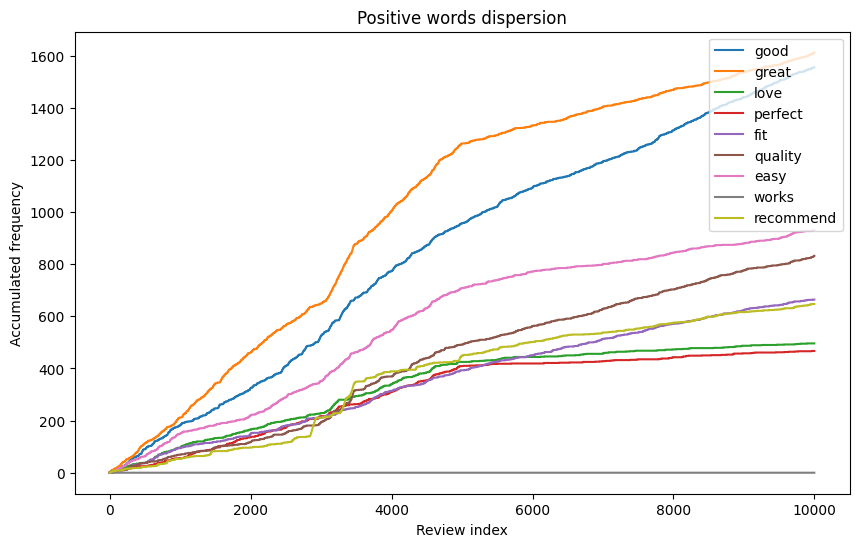

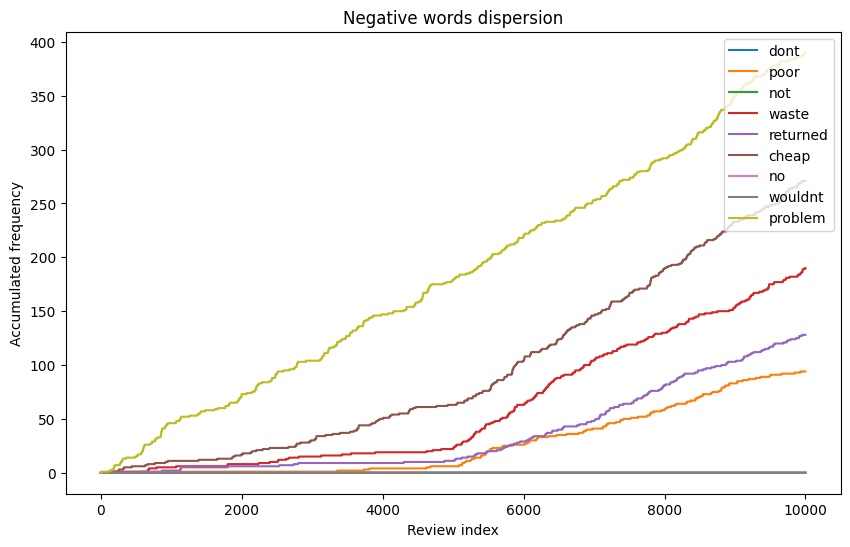

In [9]:
import spacy
import matplotlib.pyplot as plt

# Cargar el modelo de spaCy en inglés
nlp = spacy.load('en_core_web_sm')

# Función para procesar el texto con spaCy
def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

# Aplicar el tokenizador spaCy al texto
df_clean['tokens'] = df_clean['lemmatized_review'].apply(spacy_tokenizer)

# Definir las palabras positivas y negativas
positive_words = ['good', 'great', 'love', 'perfect', 'fit', 'quality', 'easy', 'works', 'recommend']
negative_words = ['dont', 'poor', 'not', 'waste', 'returned', 'cheap', 'no', 'wouldnt', 'problem']

# Función para crear la dispersión de palabras
def plot_word_dispersion(words, title):
    plt.figure(figsize=(10, 6))
    for word in words:
        plt.plot(df_clean['tokens'].apply(lambda tokens: word in tokens).cumsum(), label=word)
    plt.legend(loc='upper right')
    plt.title(title)
    plt.xlabel('Review index')
    plt.ylabel('Accumulated frequency')
    plt.show()

# Graficar la dispersión de palabras positivas y negativas
plot_word_dispersion(positive_words, 'Positive words dispersion')
plot_word_dispersion(negative_words, 'Negative words dispersion')


## **Análisis de gráficos de dispersión:**

*   **Dispersión de las Palabras Positivas:**

Palabras como "good", "great", "love", "perfect", "fit", "quality":

Se puede observar que estas palabras aparecen a lo largo de las reseñas, pero con cierto patrón en su distribución.
"Good" y "great" parecen ser de las más frecuentes en las reseñas, y se distribuyen a lo largo de las reseñas, especialmente al principio, lo que indica que los usuarios tienden a usarlas de manera consistente para describir sus experiencias.
"Perfect" y "quality" tienden a tener picos en ciertas partes de las reseñas, lo que podría sugerir que son utilizadas para enfatizar aspectos clave de los productos.
El uso de estas palabras puede indicar reseñas que dan un feedback positivo de manera directa. Esto podría reflejar emociones fuertes o satisfacción.

*   **Dispersión de las Palabras Negativas:**

Palabras como "dont", "poor", "not", "waste", "returned", "cheap":

"Dont" y "not" parecen estar presentes en muchas reseñas, lo que refleja una tendencia a expresar negaciones o críticas. La presencia de estas palabras puede indicar reseñas con un tono neutral a negativo, ya que son comunes cuando los usuarios señalan aspectos que no les gustan.

"Poor" y "cheap" aparecen en puntos específicos, sugiriendo que se utilizan en reseñas que detallan experiencias más negativas o frustrantes, donde se destacan deficiencias o expectativas no cumplidas.

"Returned" y "waste" reflejan una fuerte insatisfacción y problemas con el producto, posiblemente en el contexto de devoluciones o mal uso del producto.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


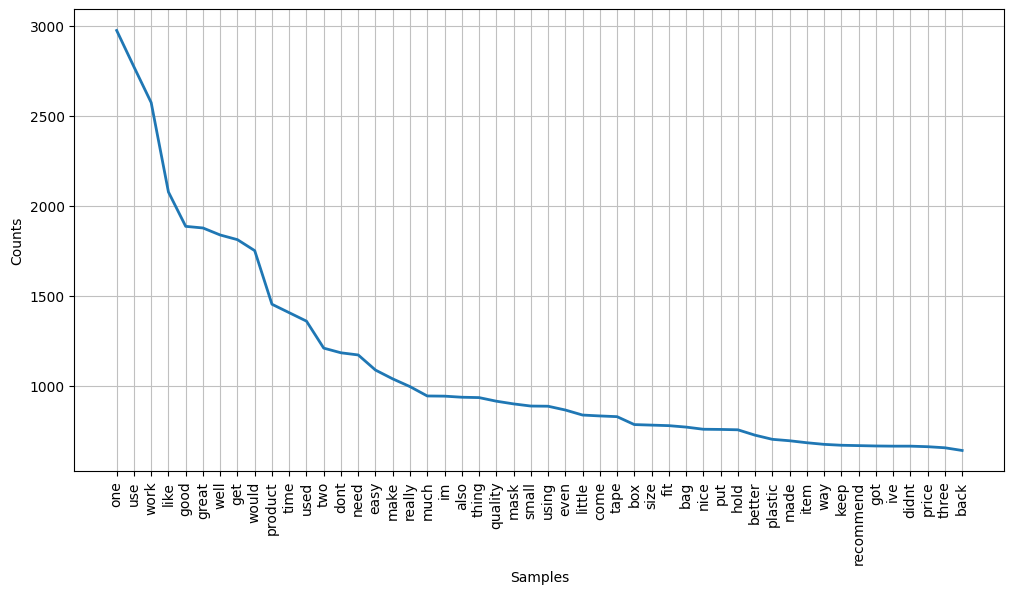

In [11]:
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Descargar stopwords si aún no están disponibles
nltk.download('stopwords')

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Concatenar todas las reseñas en un solo texto
all_reviews = ' '.join(df_clean['lemmatized_review'])

# Tokenización simple utilizando expresiones regulares
words = re.findall(r'\b\w+\b', all_reviews.lower())  # \b\w+\b busca palabras

# Eliminar stopwords y palabras con un solo carácter
filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

# Calcular la frecuencia de las palabras
freq_dist = FreqDist(filtered_words)

# Seleccionar las 50 palabras más comunes
most_common_words = freq_dist.most_common(50)

# Generar el plot de dispersión para las palabras más comunes
plt.figure(figsize=(12,6))
freq_dist.plot(50, cumulative=False)
plt.show()


## **Distribución de frecuencias:**

El gráfico muestra que hay varias palabras con alta frecuencia, y algunas otras con baja frecuencia. Esto indica que el conjunto de reviews está sesgado hacia algunas palabras comunes que se repiten a menudo (como "good" y "love"), mientras que las palabras menos frecuentes son más específicas.

# **Pipeline de Normalización - Preprocesado**

In [ ]:
import re
from num2words import num2words
from langdetect import detect, LangDetectException
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from tqdm import tqdm

# Descargar los recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Diccionario de stopwords para lenguajes
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'es': set(stopwords.words('spanish')),
    'fr': set(stopwords.words('french')),
    'de': set(stopwords.words('german')),
    'it': set(stopwords.words('italian')),
    'nl': set(stopwords.words('dutch')),
    'pt': set(stopwords.words('portuguese')),
    'ru': set(stopwords.words('russian')),
    'ar': set(stopwords.words('arabic')),
}

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para tokenizar el texto
def simple_word_tokenize(text):
    # Eliminar caracteres no alfanuméricos y separar por espacio
    words = re.findall(r'\b\w+\b', text.lower())  # Convertir a minúsculas
    return words

# Función para limpiar el texto
def clean_text(text):
    # 1. Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)

    # 2. Convertir los números a palabras
    text = re.sub(r'\b\d+\b', lambda x: num2words(int(x.group())), text)

    # 3. Eliminar caracteres especiales (excepto las palabras)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 4. Convertir el texto a minúsculas
    text = text.lower()

    # 5. Eliminar espacios al inicio y al final
    text = text.strip()

    return text

# Función para eliminar stopwords
def remove_stopwords(text, language):
    words = simple_word_tokenize(text)  # Usar la tokenización personalizada
    stop_words = stopwords_dict.get(language, set())  # Obtener stopwords para el idioma detectado

    # Filtrar las stopwords
    filtered_words = [word for word in words if word not in stop_words]

    return ' '.join(filtered_words)

# Función para lematizar el texto
def lemmatize_text(text):
    words = simple_word_tokenize(text)  # Usar la tokenización personalizada
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lematizar cada palabra
    return ' '.join(lemmatized_words)

# Función principal de preprocesado que combina todos los pasos
def preprocess_text(df):
    # Limpiar el texto
    df['cleaned_review'] = df['review'].apply(clean_text)

    # Eliminar stopwords
    processed_reviews = []
    for review in tqdm(df['cleaned_review'], desc="Eliminando stopwords"):
        try:
            # Detectar el idioma y eliminar stopwords
            language = detect(review)
            processed_review = remove_stopwords(review, language)
        except LangDetectException:
            processed_review = review  # Si falla la detección de idioma, mantener el texto original
        processed_reviews.append(processed_review)
    df['processed_review'] = processed_reviews

    # Lematizar el texto
    df['lemmatized_review'] = df['processed_review'].apply(lemmatize_text)

    return df

# Aplicar el preprocesado al dataframe
df_clean = preprocess_text(df_clean)

# Verificar los resultados
print(df_clean[['review', 'cleaned_review', 'processed_review', 'lemmatized_review']].head())
